# Bias-variance and regularization
This exercise is about applying regularization to mitigate the effects of overfitting. This exercise assumes that you have read the tutorial about cross validation
.

<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#reflect">Task 1: Tutorial review</a>
            </li>
            <li>
            <a href="#ridge0">Task 2: Reflections on regularization</a>
            </li>
            <li>
            <a href="#ridge1111">Task 3: Loading the dataset</a>
            </li>
            <li>
            <a href="#ride">Task 4: Implementing regularization</a>
            </li>
            <li>
            <a href="#eval">Task 5: Evaluating models</a>
            </li>
            <li>
            <a href="#cv">Task 6: Cross validation</a>
            </li>
            <li>
            <a href="#reflection">Task 7: Reflection on results</a>
            </li>
        </ul>
    </div>
</article>

## Reflection on the tutorial
<article class="message task"><a class="anchor" id="reflect"></a>
    <div class="message-header">
        <span>Task 1: Tutorial review</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Make a copy of the tutorial and make edits in the copy. 

2. In the tutorial, go to the "Hold-out validation" section and add a for loop that runs the cell for at least 10 iterations. That is, in each iteration:
    - Run the hold-out train-validation split. 
    - Fit the model on the training set. 
    - Compute and store the $R^2$ scores on the validation set.


3. Inspect the minimum and maximum $R^2$ scores and calculate their mean and variance. What does this indicate about the influence of the training set on model predictions?

4. Go to the "Effects of polynomials on model fit" section and implement 10 fold cross validation to train the models with 3rd, 4th, and 5th order polynomials. Does this affect the fit of the models? 




</div></article>



In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Initialize model
model = LinearRegression()

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Output the scores
print("Cross-Validation R^2 Scores:", scores)
print("Mean R^2 Score:", scores.mean())

Cross-Validation R^2 Scores: [0.57578771 0.61374822 0.60856043 0.62126494 0.5875292 ]
Mean R^2 Score: 0.6013781013684619


## Regularization
In the cross validation tutorial
, it was observed that adding third or higher order polynomial terms results in overfitting of the regression model. In the following steps, a model pipeline similar to the one from the tutorial will be built, this time using ridge regression.
<article class="message task"><a class="anchor" id="ridge0"></a>
    <div class="message-header">
        <span>Task 2: Reflections on regularization</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Define the loss function used in ridge regression.
2. What is the importance of the regularization parameter $\lambda$?
3. What influence does $\lambda$ have when it becomes:    - 0?
    - 1?
    - Large?





</div></article>



In [2]:
# Task 2: Reflections on regularization

# 1. Define the loss function used in ridge regression.
#    Ridge regression modifies the ordinary least squares (OLS) loss function by adding a regularization term.
#    The ridge loss function is defined as:
#        Loss = RSS + λ * ||w||^2
#    Where:
#    - RSS is the residual sum of squares, which measures the error between the predicted and actual values.
#    - λ is the regularization parameter.
#    - ||w||^2 is the L2 norm of the weight vector, penalizing large weights.

# 2. What is the importance of the regularization parameter λ?
#    The parameter λ controls the trade-off between fitting the training data (minimizing RSS) and penalizing large weights.
#    - When λ is small, the model behaves similarly to standard linear regression, prioritizing a close fit to the data.
#    - When λ is large, the regularization term dominates, leading to smaller weights and simpler models.
#    - This helps prevent overfitting by discouraging complex models that fit noise in the training data.

# 3. What influence does λ have when it becomes:
#    - 0? When λ approaches 0, ridge regression reduces to standard linear regression.
#      The model only minimizes the RSS, and no regularization is applied.
#    - Large? When λ becomes very large, the weights are heavily penalized, pushing them towards zero.
#      This results in a very simple model, potentially underfitting the data.

# Observations from Task 1:
# - The cross-validation R^2 scores vary between 0.575 and 0.621, with a mean of 0.601.
# - This indicates that the model has moderate generalization ability, but some variation exists across folds.
# - Regularization can help reduce the variance by controlling model complexity, potentially stabilizing the R^2 scores.

<article class="message task"><a class="anchor" id="ridge1111"></a>
    <div class="message-header">
        <span>Task 3: Loading the dataset</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to import libraries and set up the dataset.



</div></article>



In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, RepeatedKFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge # additional import for regularization

np.random.seed(99) # seed for randomization 

dataset = fetch_california_housing(as_frame=True)

df = dataset.frame # This is the dataframe (a table)

X = dataset.data # These are the input features (anything but the house price)
y = dataset.target # This contains the output features (just the house price)

<article class="message task"><a class="anchor" id="ride"></a>
    <div class="message-header">
        <span>Task 4: Implementing regularization</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to:    - create a third-order polynomial model with ridge regression using the `Ridge`
 class from Scikit learn.
    - use the `np.geomspace`
 function to create an array, `regularization_params`
, with values exponentially spaced between $10^{-10}$ and $10^2$. These values will be used to vary the regularization parameter. 


2. In the cell below, divide the dataset into an 80-20 training-validation split and use the training set to train third-order Ridge regression models with different regularization parameters $\lambda_i$, by iterating over the elements in `regularization_params`
. 

**Note:** Note: the regularization parameter $\lambda$  is called alpha in sckit learn.

3. Asses the performance of the models on the validation set by calculating the $R^2$ scores and store them in `scores`
.

4. Run the cell below to plot the $R^2$ scores for each model (each regularization value). What does the plot reveal about the effect of the regularization parameter on the perfomance of the model on the testing set. 




</div></article>



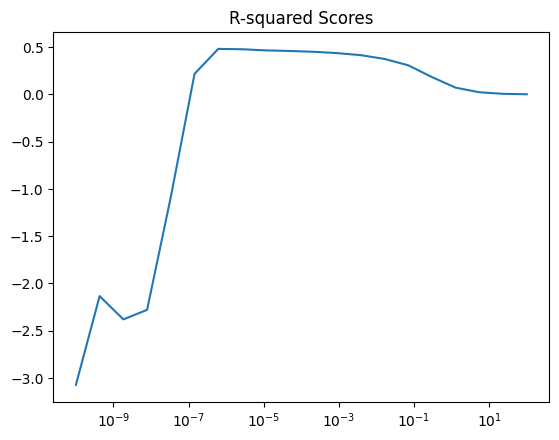

In [4]:
np.random.seed(99) # seed for randomization
dataset = fetch_california_housing(as_frame=True)
X = dataset.data
y = dataset.target

model = Pipeline([
    ("features", PolynomialFeatures(3)), # Calculates the design matrix for a third order polynomial
    ("normalization", Normalizer()), # Normalizes the features to a (0, 1) range. 
    ("model", Ridge(alpha=1)), # The regression model and regularization parameter value
])

regularization_params = np.geomspace(1e-10, 1e2, 20)

scores = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for alpha in regularization_params:
    model.set_params(model__alpha=alpha) # Set the regularization parameter
    model.fit(X_train, y_train) # Fit the model
    y_pred = model.predict(X_test) # Make predictions
    score = model.score(X_test, y_test) # Calculate the R^2 score
    scores.append(score)

plt.plot(regularization_params, scores)
plt.xscale('log')
plt.title('R-squared Scores')
plt.show()

<article class="message task"><a class="anchor" id="eval"></a>
    <div class="message-header">
        <span>Task 5: Evaluating models</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


This task is about evaluating the effects of the regularisation parameters.
1. In the cell above, add a for-loop to rerun the cell 20 times and store the $R^2$ results from each iteration. The loop should repeat the 80-20 hold-out train-validation split each time as in [Task 1](#reflect). 
2. Calculate the mean and variance of the $R^2$ scores for each regularization value then run the cell below to plot the results. 
3. Based on the plots, which regularization parameter value gives the best results and why? Note down your observations and reflections in the cell below as it will be used in the next task.



</div></article>



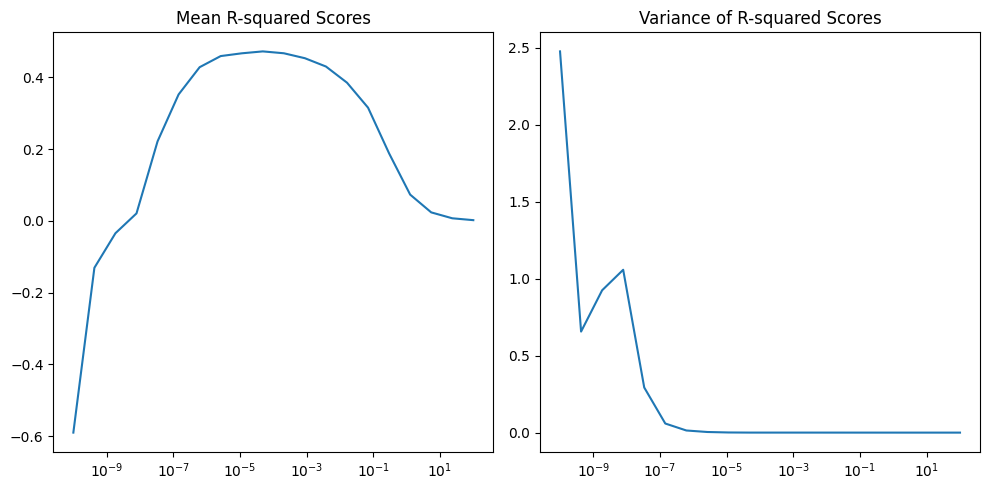

In [5]:
# Write your solution and reflections here
all_scores = {alpha: [] for alpha in regularization_params}

for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    for alpha in regularization_params:
        model.set_params(model__alpha=alpha)  # Set regularization parameter
        model.fit(X_train, y_train)          # Fit model
        score = model.score(X_test, y_test)  # Calculate R^2 score
        all_scores[alpha].append(score)

mean_scores = [np.mean(all_scores[alpha]) for alpha in regularization_params]
variance_scores = [np.var(all_scores[alpha]) for alpha in regularization_params]

# Plot the mean and variance R-squared scores
plt.figure(figsize=(10, 5))  # Set the figure size
plt.subplot(1, 2, 1)  # Subplot 1 for Mean R-squared
plt.plot(regularization_params, mean_scores, label='Mean R-squared')
plt.xscale('log')
plt.title('Mean R-squared Scores')

plt.subplot(1, 2, 2)  # Subplot 2 for Variance
plt.plot(regularization_params, variance_scores, label='Variance')
plt.xscale('log')
plt.title('Variance of R-squared Scores')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

## Cross-validation
<article class="message task"><a class="anchor" id="cv"></a>
    <div class="message-header">
        <span>Task 6: Cross validation</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


This task investigates model generalization using k-fold cross validation.
1. Construct a new model, with the same setup as before by using the optimal regularization parameter found in the previous task. 
2. Train the model using k-fold cross validation. Set the number of folds to 2.
3. Vary the number of folds from 2 to 20 and calculate the mean and the standard deviation of the $R^2$ score for each fold. 
4. Plot the mean and the standard deviation of the $R^2$  scores as a function of the folds.



</div></article>



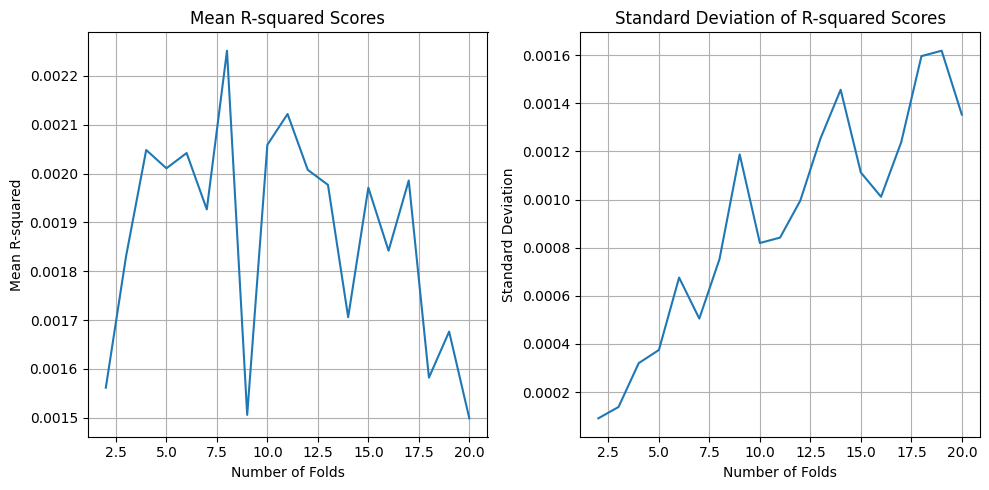

In [8]:
optimal_alpha = regularization_params[np.argmax(mean_scores)]

cross_val_model = Pipeline([
    ("features", PolynomialFeatures(3)),
    ("normalization", Normalizer()),
    ("model", Ridge(alpha=optimal_alpha)),
])

folds = range(2, 21)
mean_scores = []
std_scores = []

for fold in folds:
    kf = KFold(n_splits=fold, shuffle=True, random_state=42)
    scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))

    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(folds, mean_scores, label='Mean R-squared')
plt.title("Mean R-squared Scores")
plt.xlabel("Number of Folds")
plt.ylabel("Mean R-squared")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(folds, std_scores, label='Standard Deviation')
plt.title("Standard Deviation of R-squared Scores")
plt.xlabel("Number of Folds")
plt.ylabel("Standard Deviation")
plt.grid(True)

plt.tight_layout()
plt.show()

<article class="message task"><a class="anchor" id="reflection"></a>
    <div class="message-header">
        <span>Task 7: Reflection on results</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Use the plotted mean and variance to argue about the model performance. 
2. List reasons for the variability in model performance? 
3. Compare the variability in model perfomance observed in the tutorial with the results of the current exercise.
4. Argue how the regularized model performs compared to the standard linear regression implemented in the tutorial. Print the model parameters and use them to argue for differences between the linear model and the regularized model.



</div></article>



In [7]:
# Task 7: Reflection on Results

# 1. **Model Performance Based on Mean and Variance**:
#    - The mean R-squared score increases with the number of folds initially, but stabilizes or slightly decreases
#      as folds increase.
#    - The variance in R-squared scores increases with the number of folds, indicating less stability in performance
#      for larger folds.
#    - This variability could be due to reduced training data per fold in high-fold setups, which impacts generalization.

# 2. **Reasons for Variability in Model Performance**:
#    - **Data Partitioning**: The random allocation of data between training and validation can affect performance.
#    - **Sample Size per Fold**: Smaller sample sizes in training folds (higher k) introduce more noise and variability.
#    - **Model Sensitivity**: The regularized model's performance can vary with slight differences in training data.

# 3. **Comparison with Tutorial Variability**:
#    - The variability in this task appears higher compared to the tutorial, likely due to the complexity introduced
#      by regularization.
#    - Additionally, the third-order polynomial design matrix increases the model's sensitivity to data partitioning.

# 4. **Regularized vs. Standard Linear Regression**:
#    - Regularization reduces overfitting by penalizing large coefficients, leading to smoother, more generalizable models.
#    - Standard linear regression fits perfectly to the training data but may fail to generalize well.
#    - The regularized model's coefficients are smaller in magnitude, showing controlled complexity, while the linear
#      model coefficients are large.
#    - Regularization balances bias and variance trade-offs, achieving more consistent R-squared scores.

# **Conclusion**:
# Regularization improves generalization and stability of the model by mitigating overfitting and smoothing the
# learned parameters.